<a href="https://colab.research.google.com/github/aviichal/AutoFuel-AI/blob/main/NTCC_Inhouse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 #IMPORTING IMPORTANT LIBRARIES

from plotly.subplots import make_subplots
from scipy import stats
from scipy.stats import norm
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
import seaborn as sns
import warnings

pd.options.plotting.backend = 'plotly'
warnings.filterwarnings('ignore')

In [ ]:
#LOADING THE DATASET
auto_df = pd.read_csv('/content/auto-mpg.csv', na_values='?')
auto_df


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger


In [ ]:
auto_df.shape

(398, 9)

In [ ]:
auto_df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [ ]:
auto_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


In [ ]:
auto_df.isnull().mean()*100

mpg             0.000000
cylinders       0.000000
displacement    0.000000
horsepower      1.507538
weight          0.000000
acceleration    0.000000
model year      0.000000
origin          0.000000
car name        0.000000
dtype: float64

In [ ]:
auto_df.duplicated().value_counts()

False    398
Name: count, dtype: int64

In [ ]:
auto_df['car name'].value_counts()

car name
ford pinto             6
toyota corolla         5
amc matador            5
ford maverick          5
chevrolet chevette     4
                      ..
chevrolet monza 2+2    1
ford mustang ii        1
pontiac astro          1
amc pacer              1
chevy s-10             1
Name: count, Length: 305, dtype: int64

In [ ]:
auto_df['brand'] = auto_df['car name'].apply(lambda x: x.split()[0])
auto_df['name'] = auto_df['car name'].apply(lambda x: ' '.join(x.split()[1:]))
auto_df.drop(['car name'], axis=1, inplace=True)
auto_df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,brand,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet,chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick,skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth,satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc,rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford,torino
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,1,ford,mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,2,vw,pickup
395,32.0,4,135.0,84.0,2295,11.6,82,1,dodge,rampage
396,28.0,4,120.0,79.0,2625,18.6,82,1,ford,ranger


In [ ]:
auto_df.nunique().sort_values(ascending=False)

weight          351
name            300
mpg             129
acceleration     95
horsepower       93
displacement     82
brand            37
model year       13
cylinders         5
origin            3
dtype: int64

In [ ]:
auto_df['brand'].value_counts()

brand
ford             51
chevrolet        43
plymouth         31
amc              28
dodge            28
toyota           25
datsun           23
buick            17
pontiac          16
volkswagen       15
honda            13
mercury          11
mazda            10
oldsmobile       10
fiat              8
peugeot           8
audi              7
chrysler          6
vw                6
volvo             6
renault           5
saab              4
subaru            4
opel              4
chevy             3
bmw               2
cadillac          2
maxda             2
mercedes-benz     2
triumph           1
vokswagen         1
mercedes          1
hi                1
capri             1
chevroelt         1
toyouta           1
nissan            1
Name: count, dtype: int64

In [ ]:
#DATA CLEANING
def fix_brand_names(brand):
    if brand in ['vw', 'vokswagen']:
        return 'volkswagen'
    elif brand in ['chevy', 'chevroelt']:
        return 'chevrolet'
    elif brand == 'maxda':
        return 'mazda'
    elif brand == 'mercedes':
        return 'mercedes-benz'
    elif brand == 'toyouta':
        return 'toyota'
    else:
        return brand

In [ ]:
auto_df['brand'] = auto_df['brand'].apply(lambda x: fix_brand_names(x))
auto_df['brand'].value_counts()

brand
ford             51
chevrolet        47
plymouth         31
amc              28
dodge            28
toyota           26
datsun           23
volkswagen       22
buick            17
pontiac          16
honda            13
mazda            12
mercury          11
oldsmobile       10
fiat              8
peugeot           8
audi              7
volvo             6
chrysler          6
renault           5
saab              4
opel              4
subaru            4
mercedes-benz     3
cadillac          2
bmw               2
capri             1
hi                1
triumph           1
nissan            1
Name: count, dtype: int64

In [ ]:
auto_df[auto_df['brand'] == 'hi']

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,brand,name
28,9.0,8,304.0,193.0,4732,18.5,70,1,hi,1200d


In [ ]:
auto_df.at[28, 'brand'] = 'harvester'
auto_df['brand'].value_counts()

brand
ford             51
chevrolet        47
plymouth         31
amc              28
dodge            28
toyota           26
datsun           23
volkswagen       22
buick            17
pontiac          16
honda            13
mazda            12
mercury          11
oldsmobile       10
fiat              8
peugeot           8
audi              7
volvo             6
chrysler          6
renault           5
saab              4
opel              4
subaru            4
mercedes-benz     3
cadillac          2
bmw               2
capri             1
harvester         1
triumph           1
nissan            1
Name: count, dtype: int64

In [ ]:
auto_df[auto_df['brand'] == 'capri']

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,brand,name
184,25.0,4,140.0,92.0,2572,14.9,76,1,capri,ii


In [ ]:
auto_df.at[184, 'brand'] = 'ford'
auto_df.at[184, 'name'] = 'capri ii'
auto_df['brand'].value_counts()

brand
ford             52
chevrolet        47
plymouth         31
amc              28
dodge            28
toyota           26
datsun           23
volkswagen       22
buick            17
pontiac          16
honda            13
mazda            12
mercury          11
oldsmobile       10
peugeot           8
fiat              8
audi              7
chrysler          6
volvo             6
renault           5
subaru            4
opel              4
saab              4
mercedes-benz     3
bmw               2
cadillac          2
triumph           1
harvester         1
nissan            1
Name: count, dtype: int64

In [ ]:
#EXPLORATORY DATA ANALYSIS FOR CATEGORICAL VARIABLES
auto_df[['cylinders']].plot.hist()

In [ ]:
auto_df[['origin']].plot.hist()

In [ ]:
#EXPLORATORY DATA ANALYSIS FOR NUMERICAL VARIABLES
def plot_box_hist(df, name):
    fig = make_subplots(rows=1, cols=2)

    fig.add_trace(
        go.Box(
            y=df[name],
            name=name,
            showlegend=False
        ),
        row=1, col=1
    )

    fig.add_trace(
        go.Histogram(
            x=df[name],
            name=name,
            showlegend=False
        ),
        row=1, col=2
    )

    fig.update_layout(title_text=name)
    fig.show()

In [ ]:
plot_box_hist(auto_df, 'mpg')

In [ ]:
plot_box_hist(auto_df, 'displacement')

In [ ]:
plot_box_hist(auto_df, 'horsepower')

In [ ]:
plot_box_hist(auto_df, 'weight')

In [ ]:
plot_box_hist(auto_df, 'acceleration')

In [ ]:
plot_box_hist(auto_df, 'model year')

In [ ]:
def plot_h_bar(df, x, y, color):
    return px.bar(
            df.sort_values(x, ascending=False)[:10],
            x=x,
            y=y,
            text=x,
            color=color
        ).update_layout(
            yaxis={'categoryorder': 'total ascending'}
        )

In [ ]:
#Top 10 Vehicles with Highest MPG(MPG stands for miles per gallon)
plot_h_bar(auto_df, 'mpg', 'name', 'brand')

In [ ]:
#Top 10 Vehicles with Highest Displacement
plot_h_bar(auto_df, 'displacement', 'name', 'brand')


In [ ]:
#Top 10 Vehicles with Highest Horsepower
plot_h_bar(auto_df, 'horsepower', 'name', 'brand')


In [ ]:
#Top 10 Vehicles with Highest Weight
plot_h_bar(auto_df, 'weight', 'name', 'brand')

In [ ]:
#MPG vs. Weight vs. Horsepower
px.scatter(auto_df, x='horsepower', y='mpg', color='weight')

In [ ]:
#Scatterplot Matrix
px.scatter_matrix(
    auto_df,
    dimensions=['mpg', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year'],
    color='cylinders'
).update_layout(width=1000, height=1000)

In [ ]:
px.scatter_matrix(
    auto_df,
    dimensions=['mpg', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year'],
    color='origin'
).update_layout(width=1000, height=1000)

In [ ]:
#Correlation Heatmap
numeric_df = auto_df.select_dtypes(include='number')

px.imshow(numeric_df.corr(), color_continuous_scale='RdBu', text_auto=True).update_layout(width=950, height=950)

In [ ]:
#REPLACING NULL VALUES
auto_df.groupby(['cylinders', 'origin']).agg({'horsepower': ['mean', 'median']})

horsepower       
                        mean median
cylinders origin                   
3         3        99.250000   98.5
4         1        80.956522   84.0
          2        78.311475   76.0
          3        75.579710   70.0
5         2        82.333333   77.0
6         1        99.671233  100.0
          2       113.500000  122.5
          3       115.833333  118.0
8         1       158.300971  150.0

In [ ]:
auto_df['horsepower'] = auto_df['horsepower'].fillna(auto_df.groupby(['cylinders', 'origin'])['horsepower'].transform('median'))
auto_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   brand         398 non-null    object 
 9   name          398 non-null    object 
dtypes: float64(4), int64(4), object(2)
memory usage: 31.2+ KB


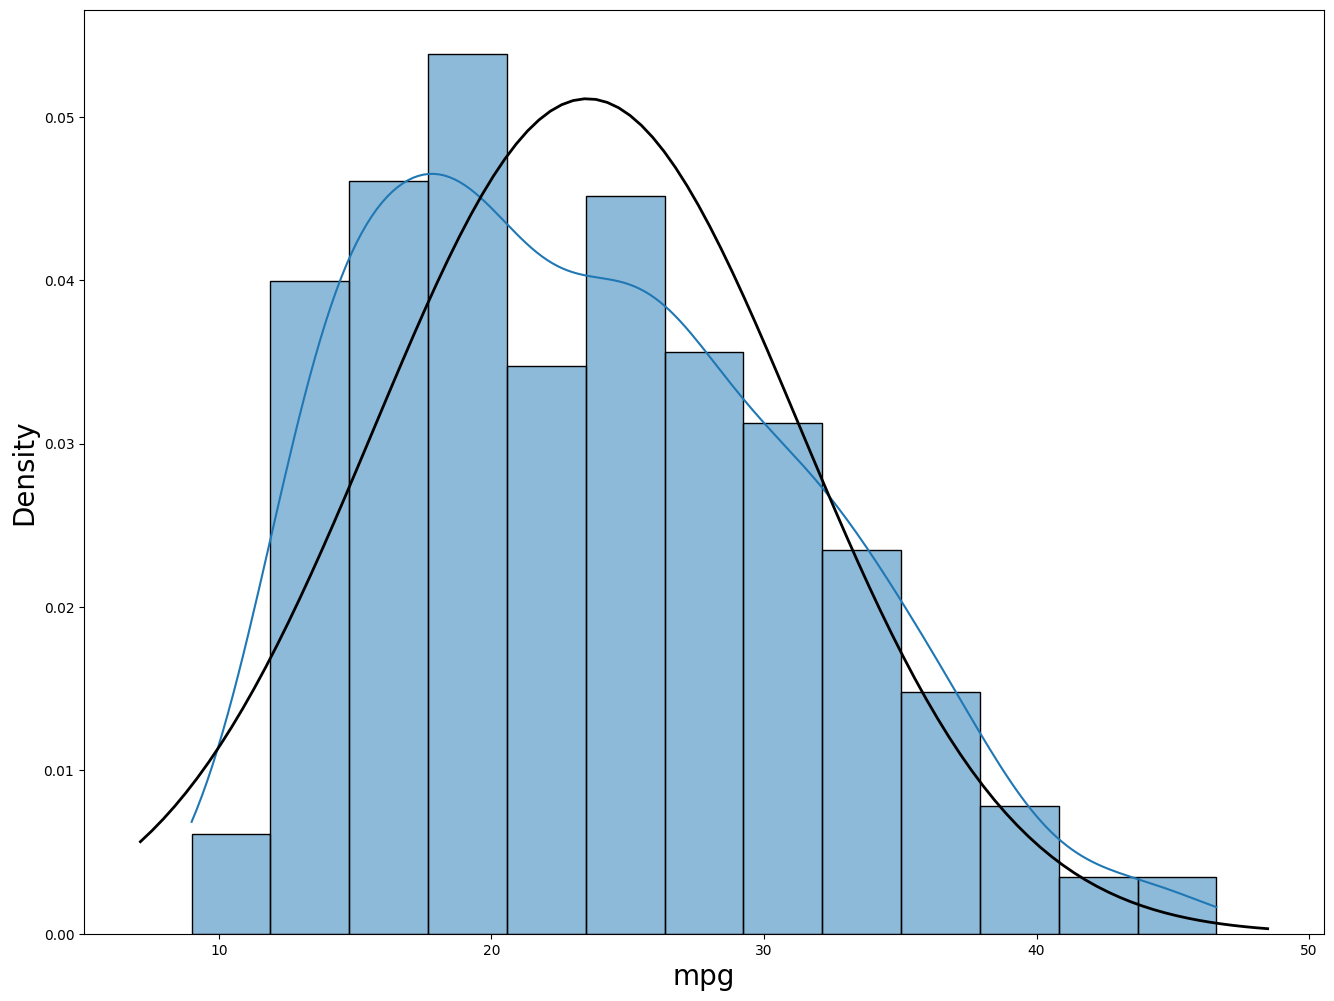

In [ ]:
#Feature Engineering
#mpg
def plot_distplot(df, name):
    mu, std = norm.fit(auto_df['mpg'])

    plt.figure(figsize=(16, 12))
    sns.histplot(df[name], stat='density', kde=True)

    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    plt.xlabel(name, fontsize=20)
    plt.ylabel('Density', fontsize=20)
    plt.plot(x, p, 'k', linewidth=2)
    plt.show()

    return mu, std
mu, std = plot_distplot(auto_df, 'mpg')

In [ ]:
mu, std

(23.514572864321607, 7.806159061274433)

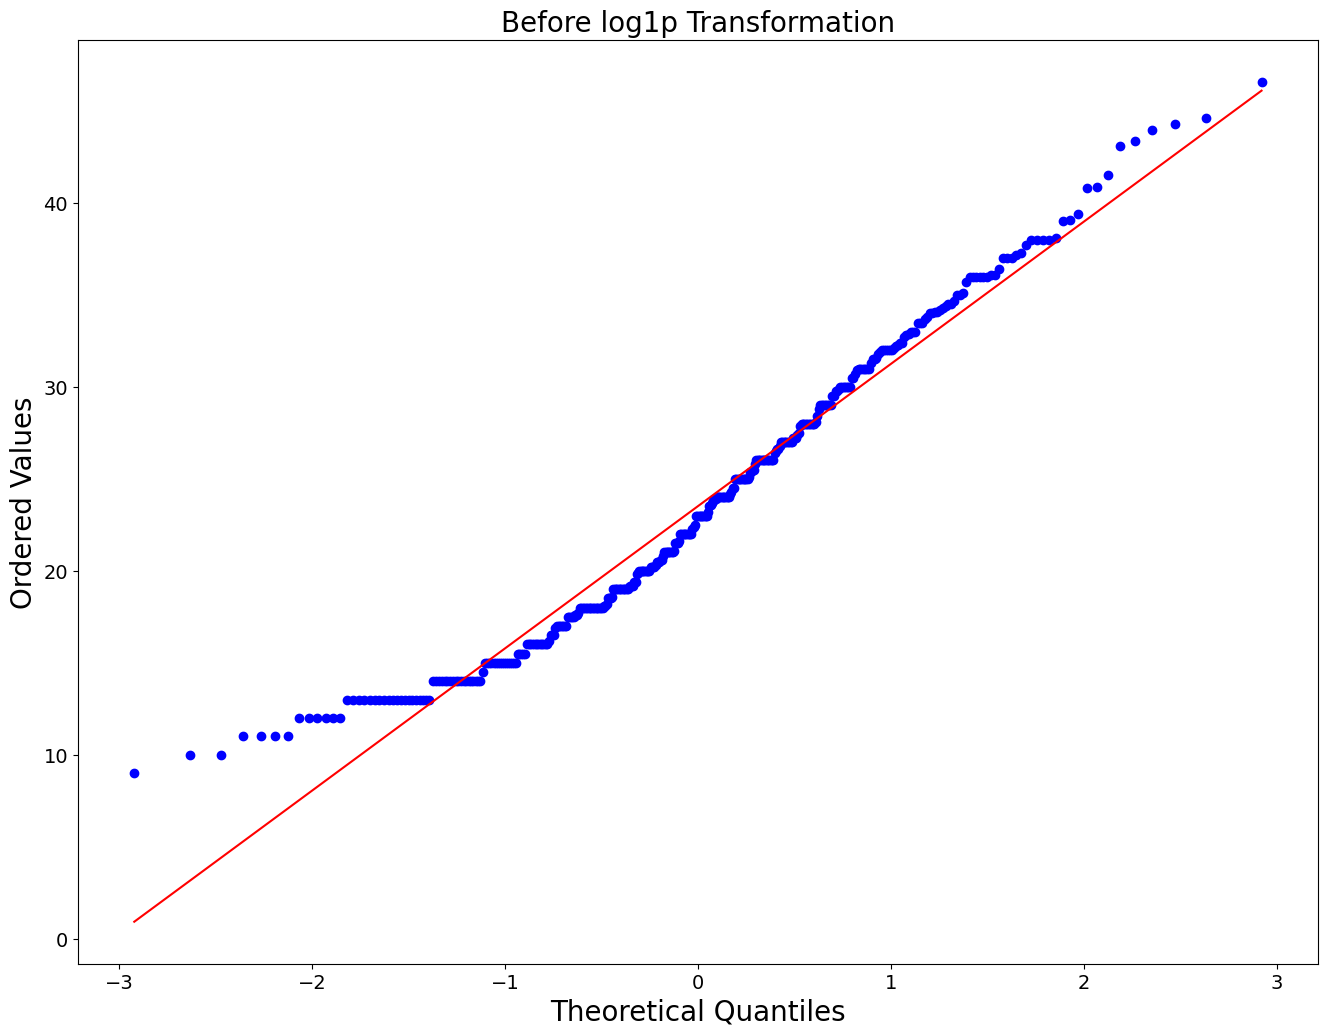

In [ ]:
#The dependent variable should be normally distributed so that models can provide better results. This can be done by applying the log1p transformation.
#BEFORE log1p Transformation
fig = plt.figure(figsize=(16, 12))
stats.probplot(auto_df['mpg'], plot=plt)
plt.xlabel('Theoretical Quantiles', fontsize=20)
plt.ylabel('Ordered Values', fontsize=20)
plt.title("Before log1p Transformation", size=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

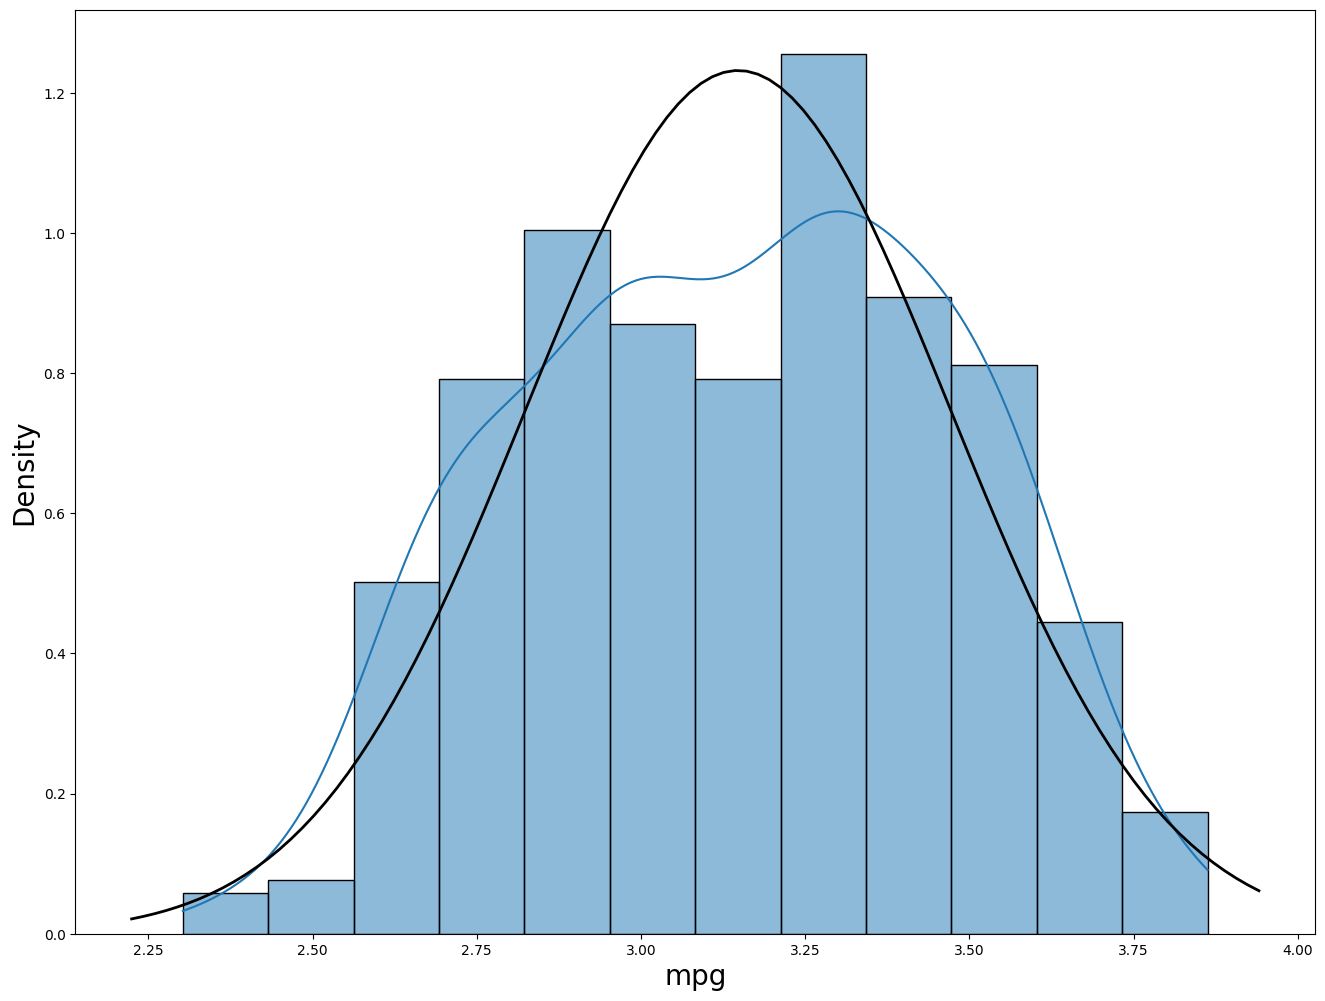

(3.1478302770344047, 0.32375928015327066)

In [ ]:
auto_df['mpg'] = np.log1p(auto_df['mpg'])
plot_distplot(auto_df, 'mpg')

In [ ]:
mu, std

(23.514572864321607, 7.806159061274433)

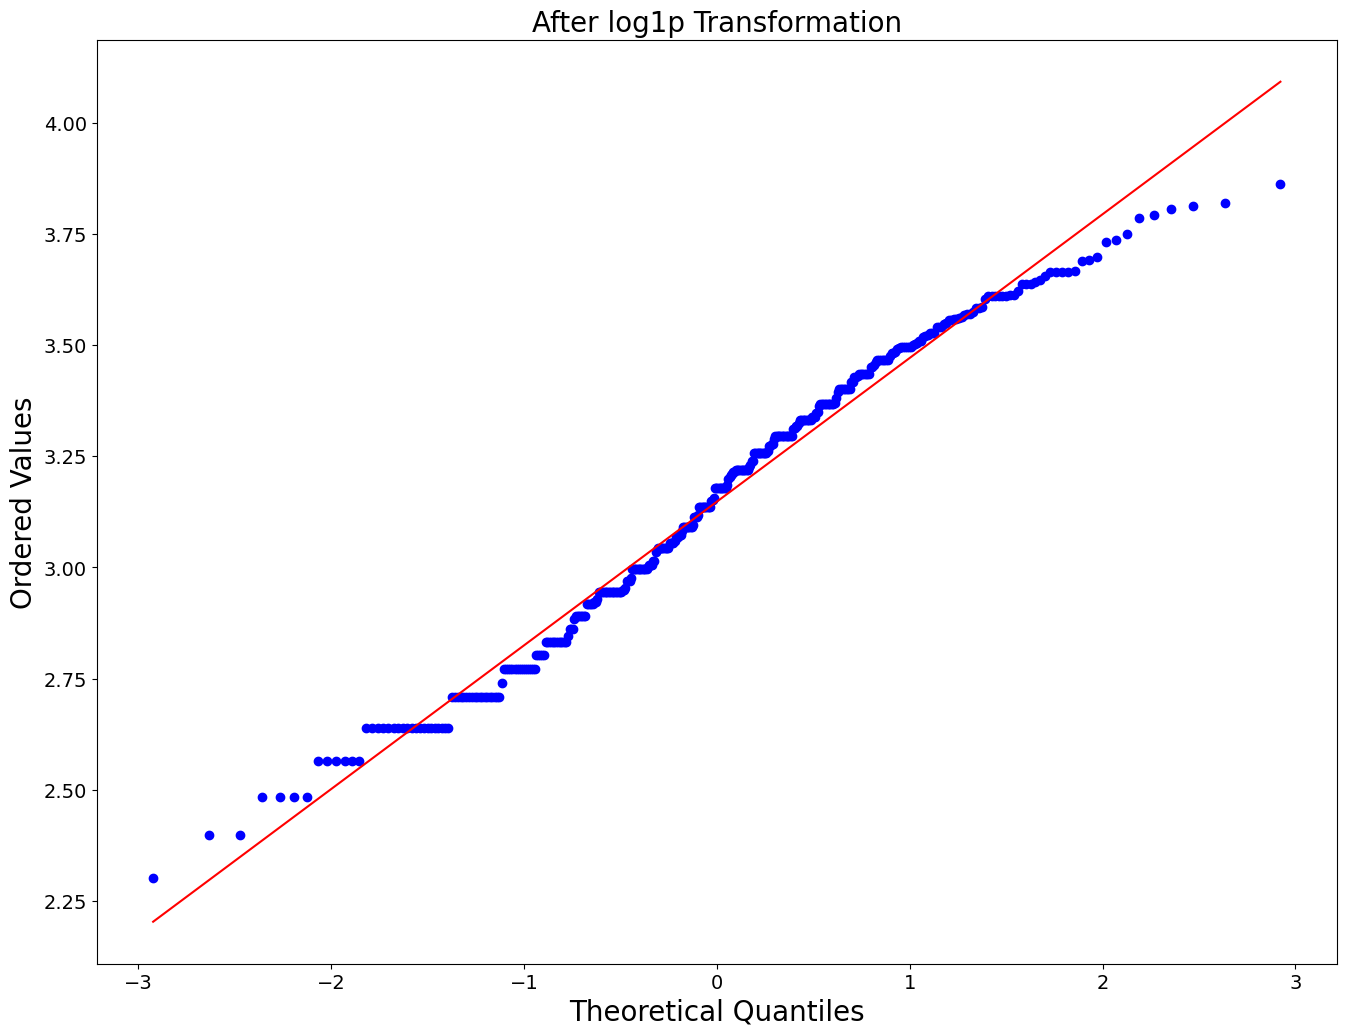

In [ ]:
#AFTER log1p Transformation
fig = plt.figure(figsize=(16, 12))
stats.probplot(auto_df['mpg'], plot=plt)
plt.xlabel('Theoretical Quantiles', fontsize=20)
plt.ylabel('Ordered Values', fontsize=20)
plt.title('After log1p Transformation', fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [ ]:
#One Hot Encoding
auto_df = pd.get_dummies(auto_df, columns=['cylinders', 'origin', 'brand'])
auto_df

,mpg,displacement,horsepower,weight,acceleration,model year,name,cylinders_3,cylinders_4,cylinders_5,...,brand_peugeot,brand_plymouth,brand_pontiac,brand_renault,brand_saab,brand_subaru,brand_toyota,brand_triumph,brand_volkswagen,brand_volvo
0,2.944439,307.0,130.0,3504,12.0,70,chevelle malibu,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2.772589,350.0,165.0,3693,11.5,70,skylark 320,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2.944439,318.0,150.0,3436,11.0,70,satellite,False,False,False,...,False,True,False,False,False,False,False,False,False,False
3,2.833213,304.0,150.0,3433,12.0,70,rebel sst,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2.890372,302.0,140.0,3449,10.5,70,torino,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,3.332205,140.0,86.0,2790,15.6,82,mustang gl,False,True,False,...,False,False,False,False,False,False,False,False,False,False
394,3.806662,97.0,52.0,2130,24.6,82,pickup,False,True,False,...,False,False,False,False,False,False,False,False,True,False
395,3.496508,135.0,84.0,2295,11.6,82,rampage,False,True,False,...,False,False,False,False,False,False,False,False,False,False
396,3.367296,120.0,79.0,2625,18.6,82,ranger,False,True,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
auto_df.nunique().sort_values(ascending=False)

weight                 351
name                   300
mpg                    129
acceleration            95
horsepower              93
displacement            82
model year              13
brand_peugeot            2
brand_honda              2
brand_mazda              2
brand_mercedes-benz      2
brand_mercury            2
brand_nissan             2
brand_oldsmobile         2
brand_opel               2
brand_renault            2
brand_plymouth           2
brand_pontiac            2
brand_ford               2
brand_saab               2
brand_subaru             2
brand_toyota             2
brand_triumph            2
brand_volkswagen         2
brand_harvester          2
brand_datsun             2
brand_fiat               2
brand_dodge              2
cylinders_3              2
cylinders_4              2
cylinders_5              2
cylinders_6              2
cylinders_8              2
origin_1                 2
origin_2                 2
origin_3                 2
brand_amc                2
b

In [ ]:
[auto_df[column].value_counts(normalize=True) for column in auto_df.columns]

[mpg
 2.639057    0.050251
 2.708050    0.047739
 2.944439    0.042714
 2.772589    0.040201
 3.295837    0.035176
               ...   
 3.493473    0.002513
 2.884801    0.002513
 2.954910    0.002513
 3.148453    0.002513
 3.806662    0.002513
 Name: proportion, Length: 129, dtype: float64,
 displacement
 97.0     0.052764
 98.0     0.045226
 350.0    0.045226
 318.0    0.042714
 250.0    0.042714
            ...   
 104.0    0.002513
 110.0    0.002513
 130.0    0.002513
 111.0    0.002513
 144.0    0.002513
 Name: proportion, Length: 82, dtype: float64,
 horsepower
 150.0    0.055276
 90.0     0.050251
 88.0     0.047739
 110.0    0.045226
 100.0    0.045226
            ...   
 122.0    0.002513
 61.0     0.002513
 93.0     0.002513
 148.0    0.002513
 82.0     0.002513
 Name: proportion, Length: 93, dtype: float64,
 weight
 1985    0.010050
 2130    0.010050
 2125    0.007538
 2945    0.007538
 2265    0.007538
           ...   
 2875    0.002513
 3102    0.002513
 3664    0.0025

In [ ]:
useless_columns = [columns for columns in auto_df.columns if auto_df[columns].nunique() == 2 and (auto_df[columns].value_counts(normalize=True) < 0.03).any()]

print(f'Number of useless variables: {len(useless_columns)}')

auto_df.drop(useless_columns, axis=1, inplace=True)

Number of useless variables: 19


In [ ]:
numeric_df = auto_df.select_dtypes(include='number')
px.imshow(numeric_df.corr(), color_continuous_scale='RdBu', text_auto=True).update_layout(width=950, height=950)

In [ ]:
#Preprocessing
auto_df = auto_df.drop(['name'], axis=1)
auto_df

,mpg,displacement,horsepower,weight,acceleration,model year,cylinders_4,cylinders_6,cylinders_8,origin_1,...,brand_chevrolet,brand_datsun,brand_dodge,brand_ford,brand_honda,brand_mazda,brand_plymouth,brand_pontiac,brand_toyota,brand_volkswagen
0,2.944439,307.0,130.0,3504,12.0,70,False,False,True,True,...,True,False,False,False,False,False,False,False,False,False
1,2.772589,350.0,165.0,3693,11.5,70,False,False,True,True,...,False,False,False,False,False,False,False,False,False,False
2,2.944439,318.0,150.0,3436,11.0,70,False,False,True,True,...,False,False,False,False,False,False,True,False,False,False
3,2.833213,304.0,150.0,3433,12.0,70,False,False,True,True,...,False,False,False,False,False,False,False,False,False,False
4,2.890372,302.0,140.0,3449,10.5,70,False,False,True,True,...,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,3.332205,140.0,86.0,2790,15.6,82,True,False,False,True,...,False,False,False,True,False,False,False,False,False,False
394,3.806662,97.0,52.0,2130,24.6,82,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
395,3.496508,135.0,84.0,2295,11.6,82,True,False,False,True,...,False,False,True,False,False,False,False,False,False,False
396,3.367296,120.0,79.0,2625,18.6,82,True,False,False,True,...,False,False,False,True,False,False,False,False,False,False


In [ ]:
X = auto_df.drop(['mpg'], axis=1)
y = auto_df['mpg']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#Model Building
models = []

In [ ]:
#Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
lr.coef_

array([ 0.06838889, -0.09589237, -0.1880509 , -0.0091127 ,  0.10537542,
        0.05654596,  0.00293524,  0.02338428, -0.01884014,  0.02204489,
        0.00188494, -0.00678303,  0.00905602,  0.00086462,  0.02497767,
        0.00449372, -0.01069588,  0.00311836,  0.00356867,  0.01490651,
        0.01788229,  0.00348356, -0.00645842])

In [ ]:
y_pred = lr.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
rmse

0.09971993173050593

In [ ]:
r2 = r2_score(y_test, y_pred)
r2

0.8989741507387512

In [ ]:
models.append({
    'name': 'Linear Regression',
    'model': lr,
    'rmse': rmse,
    'r^2': r2
})

In [ ]:
#Ridge Regression
alphas = np.logspace(-4, 1, 30)
param_grid = {'alpha': alphas}

ridge = Ridge(max_iter=10000, random_state=42)

grid_search = GridSearchCV(ridge,
                   param_grid,
                   cv=5,
                   scoring='neg_mean_squared_error',
                   refit=True)

grid_search.fit(X_train, y_train)
scores = grid_search.cv_results_['mean_test_score']
scores_std = grid_search.cv_results_['std_test_score']

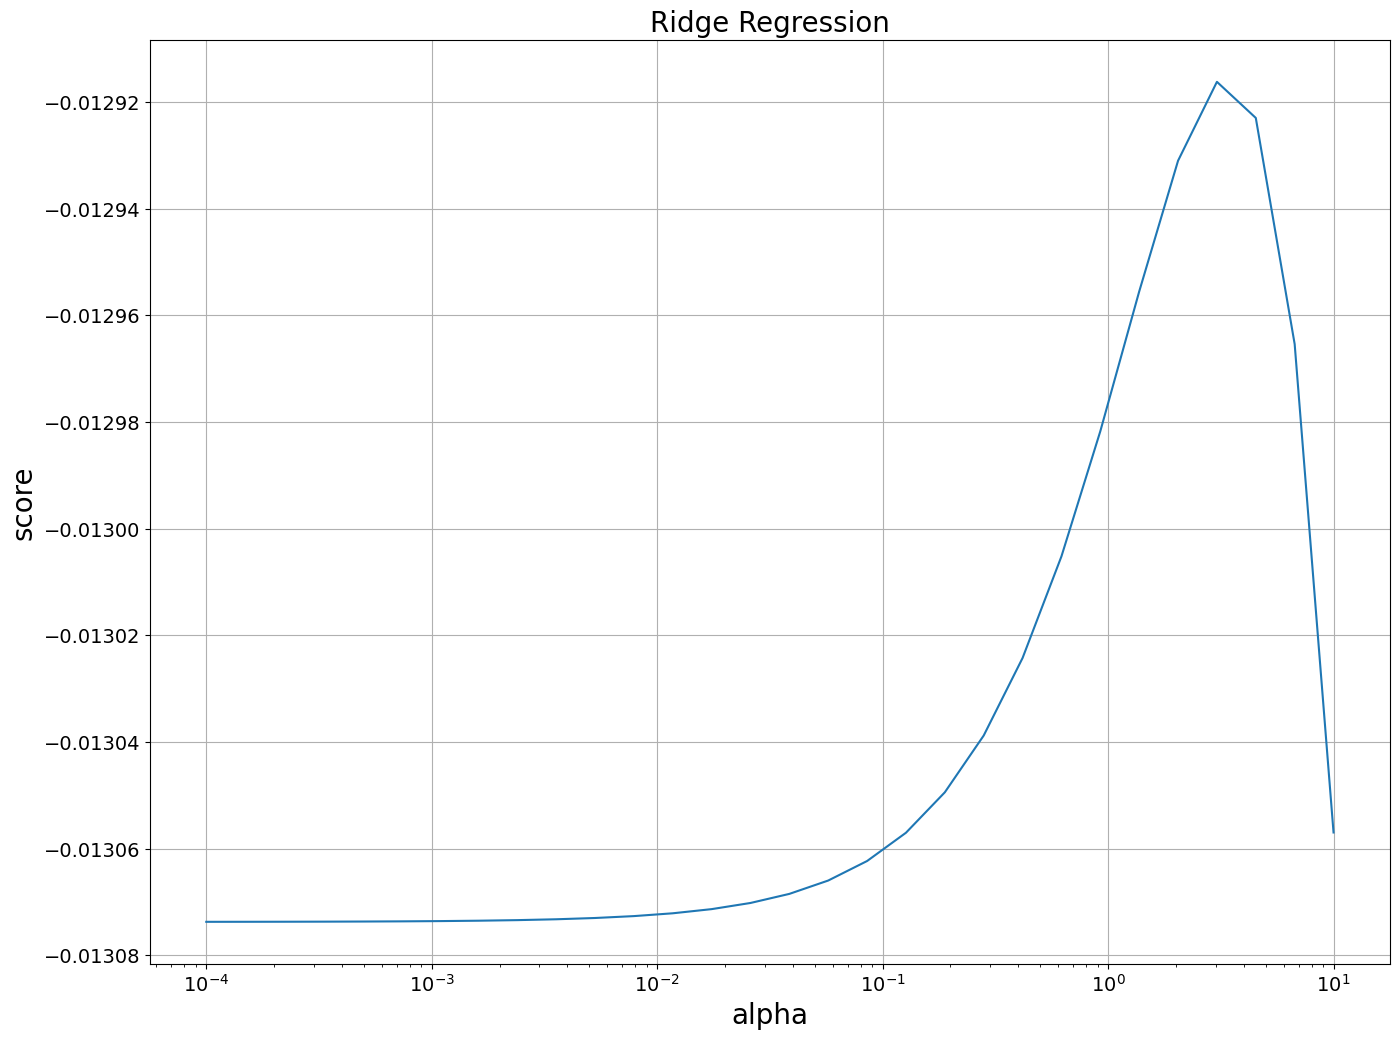

In [ ]:
plt.figure(figsize=(16, 12))
plt.semilogx(alphas, scores)
plt.xlabel('alpha', fontsize=20)
plt.ylabel('score', fontsize=20)
plt.title('Ridge Regression', fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.show()

In [ ]:
grid_search.best_estimator_.coef_

array([ 0.04446765, -0.09307988, -0.16959373, -0.01089901,  0.10288934,
        0.05112304, -0.00161113,  0.01898776, -0.01690045,  0.01795895,
        0.00339681, -0.00703015,  0.00837238, -0.00037368,  0.02286041,
        0.00316499, -0.01209231,  0.00273007,  0.00090301,  0.0133288 ,
        0.01699679,  0.00182673, -0.00386757])

In [ ]:
grid_search.best_estimator_

Ridge(alpha=3.039195382313201, max_iter=10000, random_state=42)

In [ ]:
y_pred = grid_search.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
rmse

0.09991805012250926

In [ ]:
r2 = r2_score(y_test, y_pred)
r2

0.8985723261301832

In [ ]:
models.append({
    'name': 'Ridge Regression',
    'model': grid_search.best_estimator_,
    'rmse': rmse,
    'r^2': r2
})

In [ ]:
#Lasso Regression
alphas = np.logspace(-4, -0.5, 30)
param_grid = {'alpha': alphas}

lasso = Lasso(max_iter=10000, random_state=42)

grid_search = GridSearchCV(lasso,
                   param_grid,
                   cv=5,
                   scoring='neg_mean_squared_error',
                   refit=True)

grid_search.fit(X_train, y_train)
scores = grid_search.cv_results_['mean_test_score']
scores_std = grid_search.cv_results_['std_test_score']

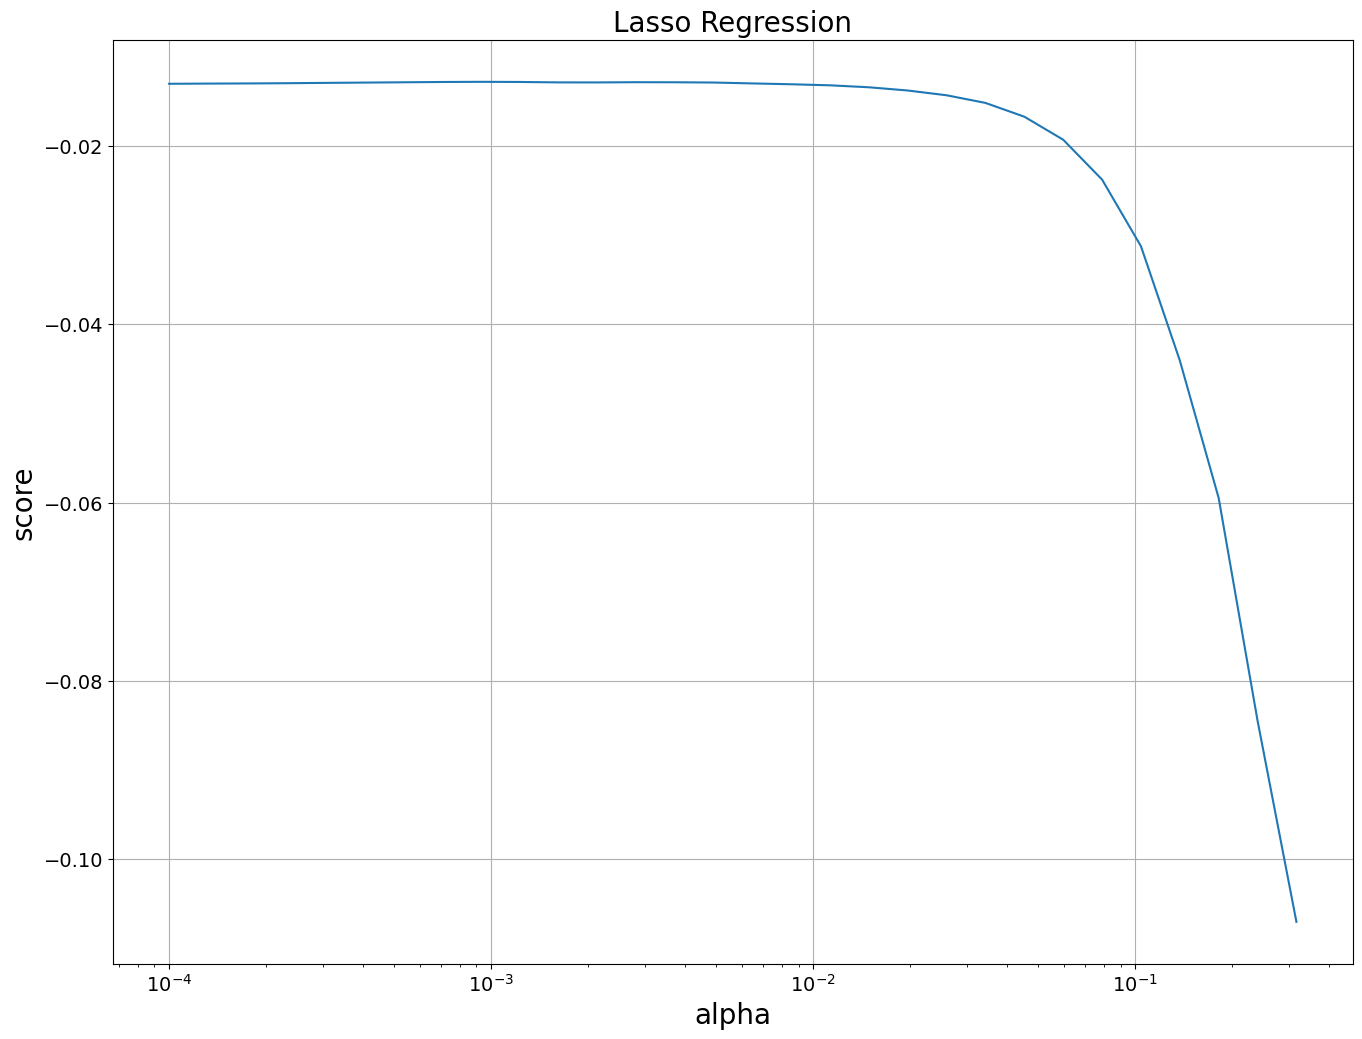

In [ ]:
plt.figure(figsize=(16, 12))
plt.semilogx(alphas, scores)
plt.xlabel('alpha', fontsize=20)
plt.ylabel('score', fontsize=20)
plt.title('Lasso Regression', fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.show()

In [ ]:
grid_search.best_estimator_.coef_

array([ 3.89801637e-02, -8.11032847e-02, -1.76816380e-01, -7.31265445e-03,
        1.03601507e-01,  4.61744721e-02, -3.09562468e-03,  1.59400289e-02,
       -1.93462644e-02,  1.08436523e-02,  0.00000000e+00, -7.99023061e-03,
        5.59935677e-03, -1.33886137e-03,  1.98962725e-02,  3.87964555e-04,
       -1.29196224e-02,  9.75834812e-04, -1.24597240e-04,  1.09556583e-02,
        1.52261271e-02,  0.00000000e+00, -1.83776254e-03])

In [ ]:
grid_search.best_estimator_

Lasso(alpha=0.0009236708571873865, max_iter=10000, random_state=42)

In [ ]:
y_pred = grid_search.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
rmse

0.09927672257536654

In [ ]:
r2 = r2_score(y_test, y_pred)
r2

0.8998701817950855

In [ ]:
models.append({
    'name': 'Lasso Regression',
    'model': grid_search.best_estimator_,
    'rmse': rmse,
    'r^2': r2
})

In [ ]:
#ElasticNet
param_grid = {
    'alpha': np.logspace(-4, -0.5, 30),
    'l1_ratio': np.arange(0.0, 1.0, 0.05)
}

enet = ElasticNet(max_iter=10000, random_state=42)

grid_search = GridSearchCV(enet,
                   param_grid,
                   cv=5,
                   scoring='neg_mean_squared_error',
                   refit=True)

grid_search.fit(X_train, y_train)
scores = grid_search.cv_results_['mean_test_score']
scores_std = grid_search.cv_results_['std_test_score']

In [ ]:
grid_search.best_estimator_.coef_

array([ 0.03822439, -0.08214813, -0.17510913, -0.00777229,  0.10338922,
        0.04643755, -0.00312702,  0.01604942, -0.01956007,  0.01082942,
        0.        , -0.00792144,  0.00580435, -0.00132306,  0.02000323,
        0.00055178, -0.01293257,  0.00107275, -0.00018076,  0.01106545,
        0.01532367,  0.        , -0.00187829])

In [ ]:
grid_search.best_estimator_

ElasticNet(alpha=0.0021261123338996556, l1_ratio=0.4, max_iter=10000,
           random_state=42)

In [ ]:
y_pred = grid_search.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
rmse

0.09934841510445754

In [ ]:
r2 = r2_score(y_test, y_pred)
r2

0.8997255123960337

In [ ]:
models.append({
    'name': 'ElasticNet',
    'model': grid_search.best_estimator_,
    'rmse': rmse,
    'r^2': r2
})


In [ ]:
#KNN Regression
n_neighbors = list(range(1, 11))
param_grid = {'n_neighbors': n_neighbors}

knn = KNeighborsRegressor()

grid_search = GridSearchCV(knn,
                   param_grid,
                   cv=5,
                   scoring='neg_mean_squared_error',
                   return_train_score=False
                   )

grid_search.fit(X_train, y_train)
scores = grid_search.cv_results_['mean_test_score']
scores_std = grid_search.cv_results_['std_test_score']

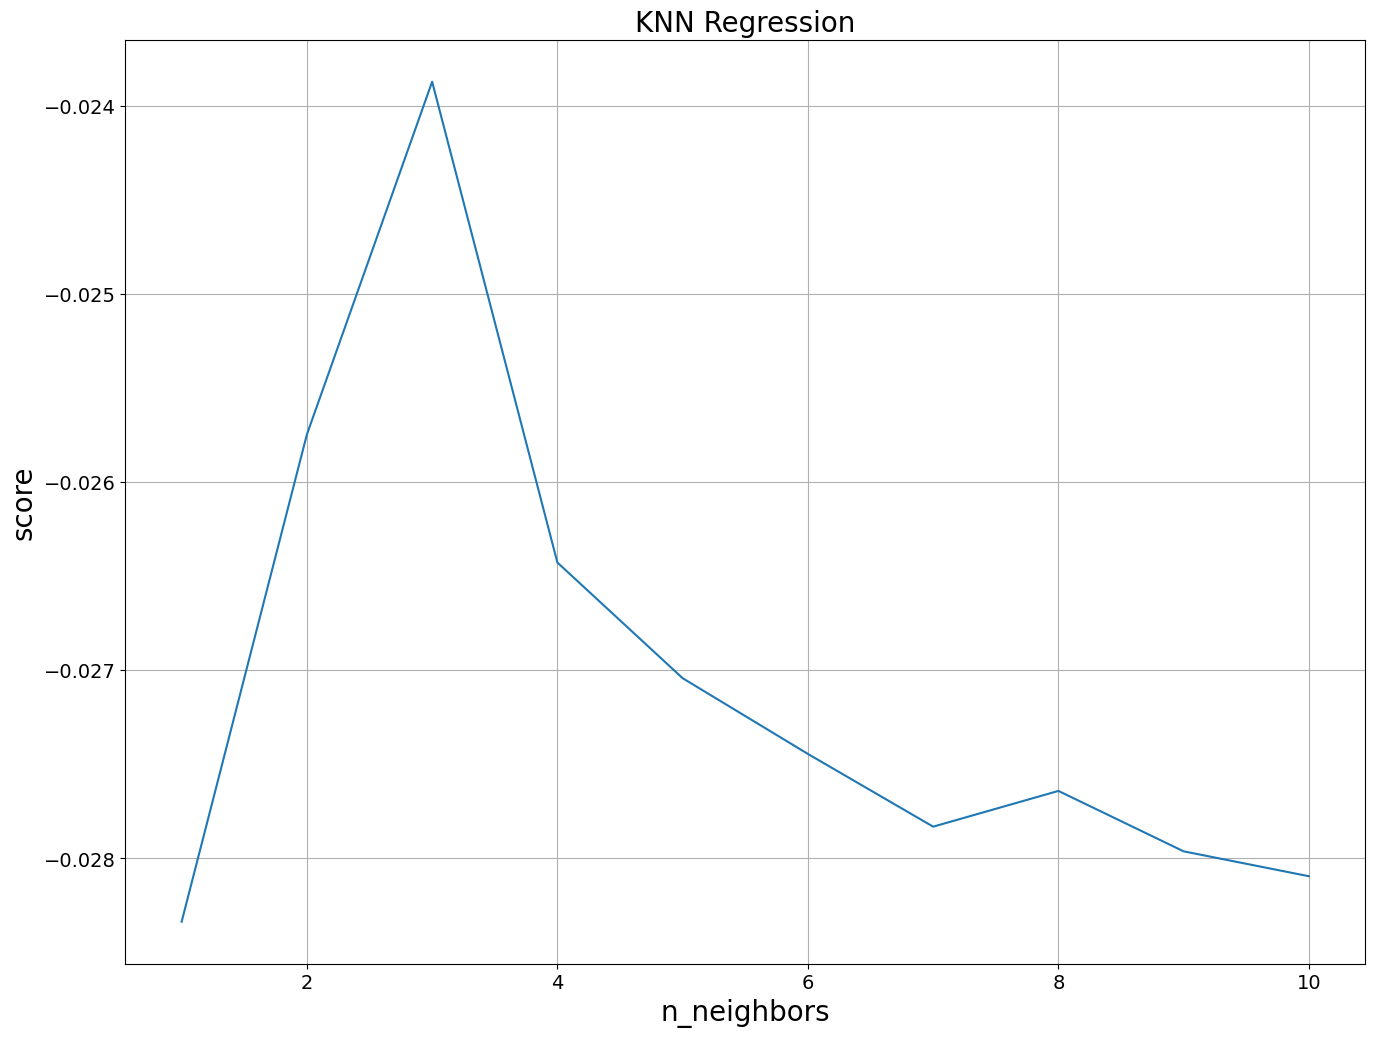

In [ ]:
plt.figure(figsize=(16, 12))
plt.plot(n_neighbors, scores)
plt.xlabel('n_neighbors', fontsize=20)
plt.ylabel('score', fontsize=20)
plt.title('KNN Regression', fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.show()

In [ ]:
grid_search.best_estimator_

KNeighborsRegressor(n_neighbors=3)

In [ ]:
y_pred = grid_search.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
rmse

0.10912761897911849

In [ ]:
r2 = r2_score(y_test, y_pred)
r2

0.8790132184005041

In [ ]:
models.append({
    'name': 'KNN Regression',
    'model': grid_search.best_estimator_,
    'rmse': rmse,
    'r^2': r2
})

In [ ]:
#Decision Tree Regression
param_grid = {
    'criterion': ['squared_error', 'absolute_error'],
    'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, None],
    'max_features': [2, 4, 8, 16, 32, None],
    'splitter': ['best', 'random'],
}

tree_reg = DecisionTreeRegressor()

grid_search = GridSearchCV(tree_reg,
                   param_grid,
                   cv=5,
                   scoring='neg_mean_squared_error',
                   return_train_score=False
                   )

grid_search.fit(X_train, y_train)
scores = grid_search.cv_results_['mean_test_score']
scores_std = grid_search.cv_results_['std_test_score']

In [ ]:
grid_search.best_estimator_

DecisionTreeRegressor(max_depth=6, max_features=32, splitter='random')

In [ ]:
y_pred = grid_search.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
rmse

0.12457487268393991

In [ ]:
r2 = r2_score(y_test, y_pred)
r2

0.8423371151133505

In [ ]:
models.append({
    'name': 'Decision Tree Regression',
    'model': grid_search.best_estimator_,
    'rmse': rmse,
    'r^2': r2
})

In [ ]:
#Random Forest Regression
n_estimators = [100, 200, 300, 500, 1000, 5000, 10000]
param_grid = {'n_estimators': n_estimators}


forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg,
                   param_grid,
                   cv=5,
                   scoring='neg_mean_squared_error',
                   return_train_score=False,
                   )

grid_search.fit(X_train, y_train)
scores = grid_search.cv_results_['mean_test_score']
scores_std = grid_search.cv_results_['std_test_score']

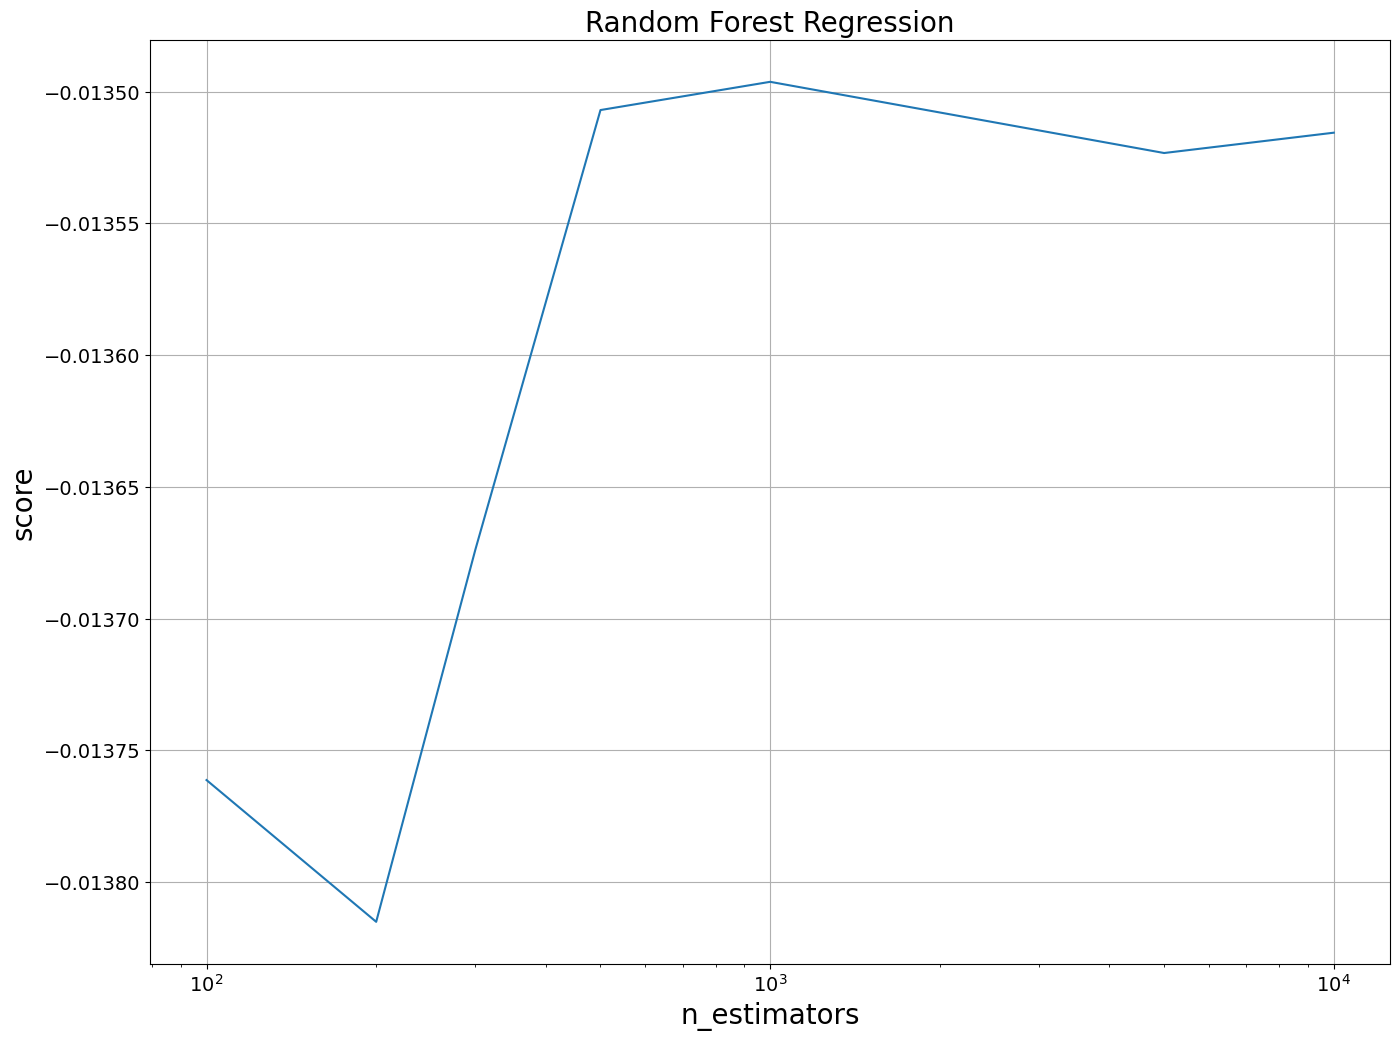

In [ ]:
plt.figure(figsize=(16, 12))
plt.semilogx(n_estimators, scores)
plt.xlabel('n_estimators', fontsize=20)
plt.ylabel('score', fontsize=20)
plt.title('Random Forest Regression', fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.show()

In [ ]:
grid_search.best_estimator_

RandomForestRegressor(n_estimators=1000)

In [ ]:
y_pred = grid_search.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
rmse


0.08942298374488235

In [ ]:
r2 = r2_score(y_test, y_pred)
r2

0.9187605679801361

In [ ]:
models.append({
    'name': 'Random Forest Regression',
    'model': grid_search.best_estimator_,
    'rmse': rmse,
    'r^2': r2
})

In [ ]:
#Support Vector Regression
param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [1, 2, 4, 8, 16],
    'gamma': [1e-7, 1e-6, 1e-5, 1e-4, 1e-3],
    'epsilon': [0.1, 0.2, 0.3, 0.5]
}

svm_reg = SVR()

grid_search = GridSearchCV(svm_reg,
                   param_grid,
                   cv=5,
                   scoring='neg_mean_squared_error',
                   return_train_score=False,
                   )

grid_search.fit(X_train, y_train)
scores = grid_search.cv_results_['mean_test_score']
scores_std = grid_search.cv_results_['std_test_score']

In [ ]:
grid_search.best_estimator_

SVR(C=16, gamma=0.001)

In [ ]:
y_pred = grid_search.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
rmse

0.0949920689762782

In [ ]:
r2 = r2_score(y_test, y_pred)
r2

0.9083266168905113

In [ ]:
models.append({
    'name': 'Support Vector Regression',
    'model': grid_search.best_estimator_,
    'rmse': rmse,
    'r^2': r2
})

In [ ]:
#RESULTS
pd.DataFrame(models).set_index('name').sort_values(['rmse', 'r^2'], ascending=[True, False])

,model,rmse,r^2
name,,,
Random Forest Regression,"(DecisionTreeRegressor(max_features=1.0, rando...",0.089423,0.918761
Support Vector Regression,"SVR(C=16, gamma=0.001)",0.094992,0.908327
Lasso Regression,"Lasso(alpha=0.0009236708571873865, max_iter=10...",0.099277,0.899870
ElasticNet,"ElasticNet(alpha=0.0021261123338996556, l1_rat...",0.099348,0.899726
Linear Regression,LinearRegression(),0.099720,0.898974
Ridge Regression,"Ridge(alpha=3.039195382313201, max_iter=10000,...",0.099918,0.898572
KNN Regression,KNeighborsRegressor(n_neighbors=3),0.109128,0.879013
Decision Tree Regression,"DecisionTreeRegressor(max_depth=6, max_feature...",0.124575,0.842337


In [ ]:
#Random Forest Regression gives the best results on the test data set, having the lowest root mean squared error of 0.09 and the highest R squared score of 0.92.